In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the first file into a dataframe named df1
df1 = pd.read_csv("train_values.csv")
df1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Reading the second file into a dataframe named df2
df2 = pd.read_csv("train_labels.csv")
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
# Merging both the dataframe df1 and df2 into df with the 'building _id' as common column
df = pd.merge(df1,df2,on = 'building_id')

In [5]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
df.shape

(260601, 40)

Dataset has 40 columns and 260600 rows

In [7]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

There is no null values in the dataset

In [8]:
sum(df.duplicated())

0

There is no duplicate rows in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Checking the datatypes of each columns

In [10]:
# Columns name
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [11]:
# Converting the boolean datatype column from int to bool
to_bool = ['has_superstructure_adobe_mud',
           'has_superstructure_mud_mortar_stone',
           'has_superstructure_stone_flag',
           'has_superstructure_cement_mortar_stone',
           'has_superstructure_mud_mortar_brick',
           'has_superstructure_cement_mortar_brick',
           'has_superstructure_timber',
           'has_superstructure_bamboo',
           'has_superstructure_rc_non_engineered',
           'has_superstructure_rc_engineered',
           'has_superstructure_other',
           'has_secondary_use',
           'has_secondary_use_agriculture',
           'has_secondary_use_hotel',
           'has_secondary_use_rental',
           'has_secondary_use_institution',
           'has_secondary_use_school',
           'has_secondary_use_industry',
           'has_secondary_use_health_post',
           'has_secondary_use_gov_office',
           'has_secondary_use_use_police',
           'has_secondary_use_other']

for i in to_bool:
    df[i] = df[i].astype('bool')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Checking the datatype after conversion

In [13]:
# Taking out Integer data
df_int = df.select_dtypes(include=['int'])
print('Total number of Integer columns: ',len(df_int.columns))
df_int.columns

Total number of Integer columns:  10


Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'count_families', 'damage_grade'],
      dtype='object')

In [14]:
# Taking out Caterorical data
df_cat = df.select_dtypes(include=['object'])
print('Total number of Caterorical columns: ',len(df_cat.columns))
df_cat.columns

Total number of Caterorical columns:  8


Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [15]:
# Taking out boolean data
df_bool = df.select_dtypes(include=['bool'])
print('Total number of Boolean columns: ',len(df_bool.columns))
df_bool.columns

Total number of Boolean columns:  22


Index(['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

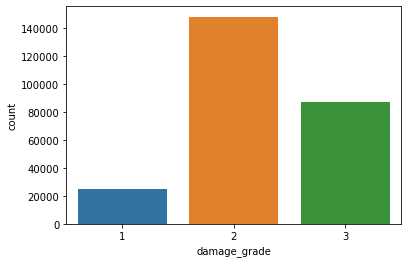

In [16]:
sns.countplot(x = df.damage_grade)
plt.show()

<AxesSubplot:title={'center':'Level of damage to the building'}, ylabel='None'>

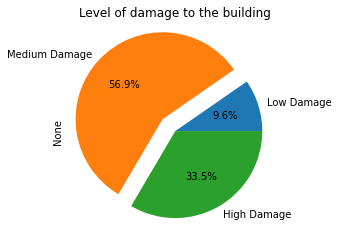

In [17]:
df.groupby('damage_grade').size().plot(kind='pie', labels=['Low Damage','Medium Damage', 'High Damage'], title = 'Level of damage to the building', explode = [0,0.2,0],autopct='%1.1f%%')

This above graph shows that most of the building faced average amount of damage due to earthquack

## Integer columns

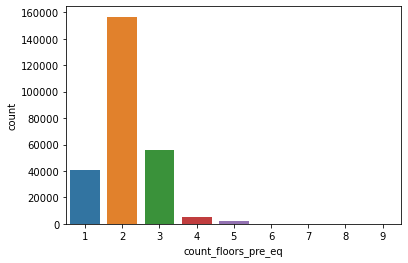

In [18]:
sns.countplot(x = df.count_floors_pre_eq)
plt.show()

From the above chart we can understand that building with 2 floors are damaged the most

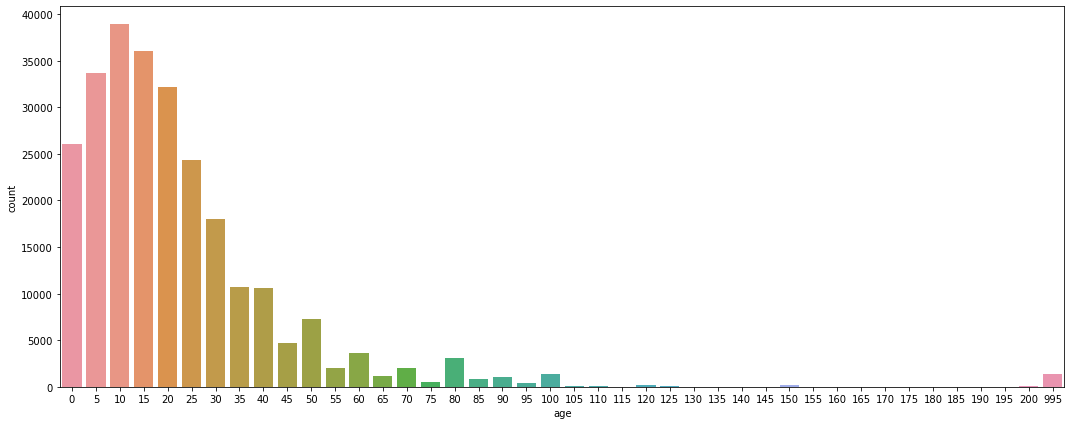

In [19]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df.age)
plt.show()

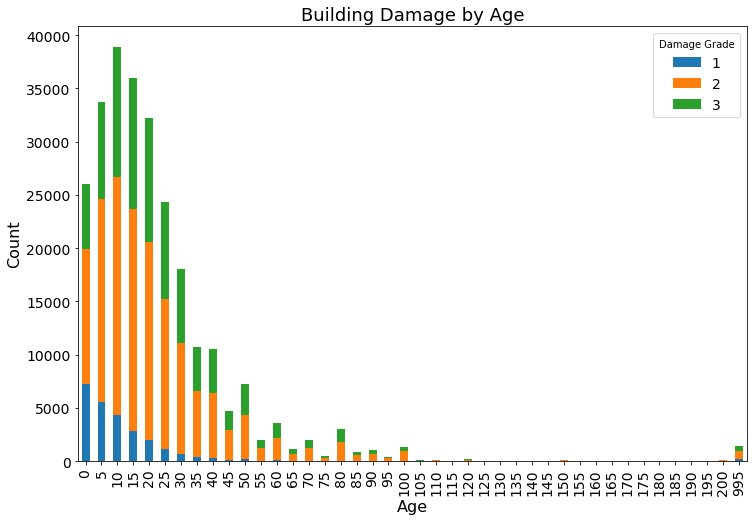

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.age, df.damage_grade).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Building Damage by Age", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Damage Grade", fontsize=14)
plt.show()

The above graph shows the damage is mostly in the building that was build newly

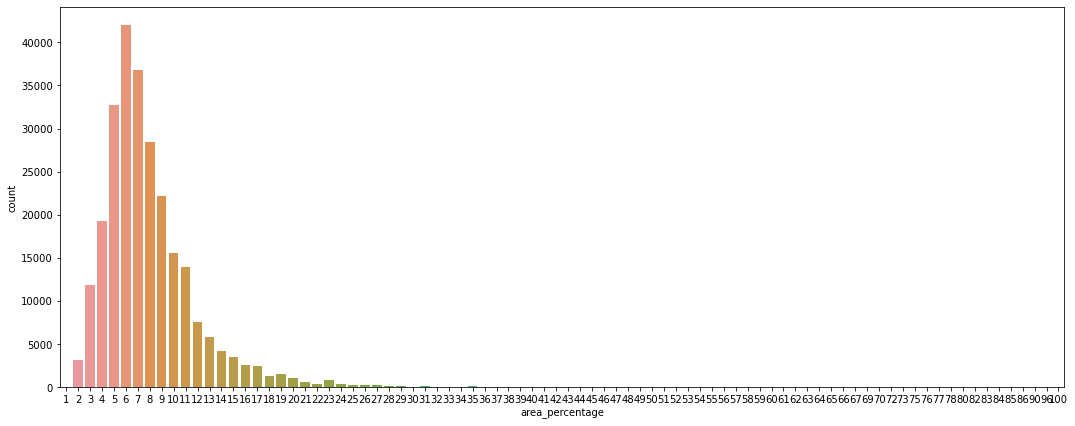

In [21]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df.area_percentage)
plt.show()

2 - 20 percentage of area is damages

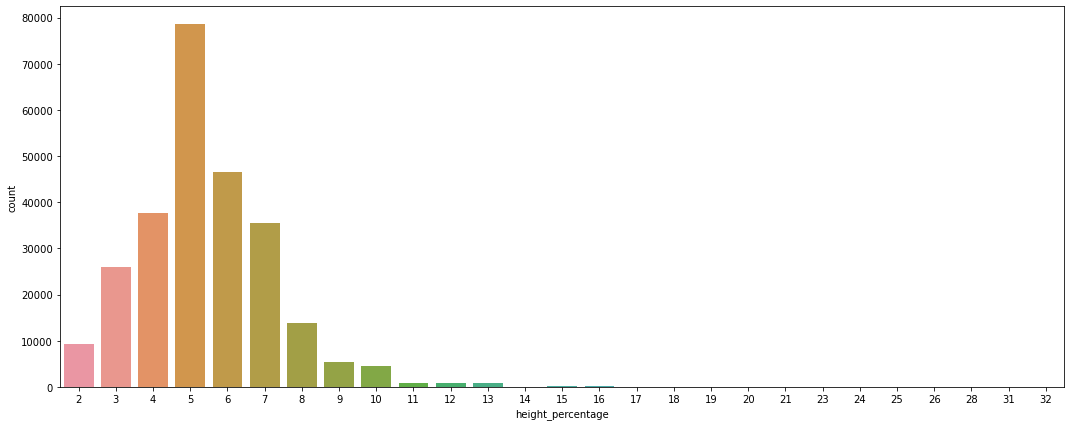

In [22]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df.height_percentage)
plt.show()

2 - 20 percentage of heights are damages

<AxesSubplot:xlabel='count_families', ylabel='count'>

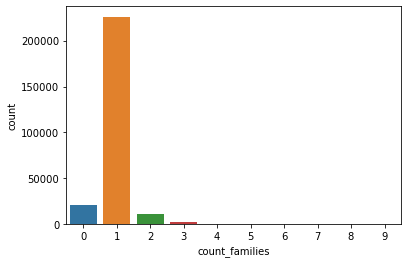

In [23]:
sns.countplot(x = df.count_families)

The building where People who were living in singles are damaged the most

<AxesSubplot:ylabel='Density'>

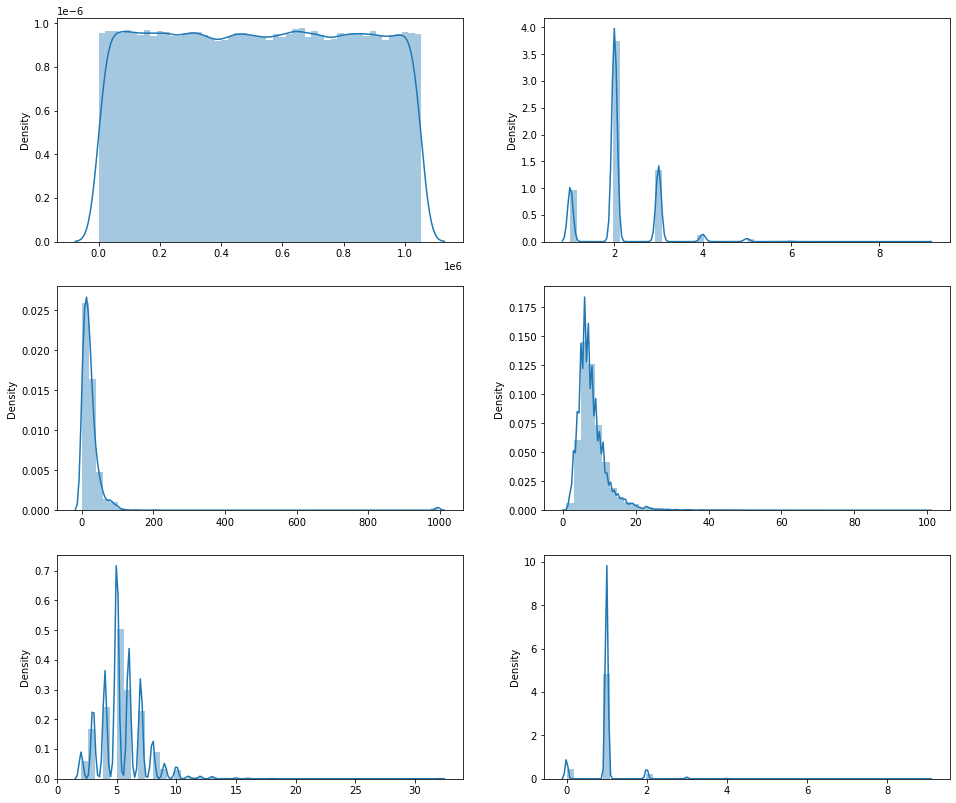

In [24]:
fig , ax  = plt.subplots(nrows=3, ncols=2, figsize  = (16, 14))
sns.distplot(ax=ax[0,0], x=df.building_id)
sns.distplot(ax  = ax[0 , 1] , x=df.count_floors_pre_eq)
sns.distplot(ax  = ax[1 , 0] , x=df.age)
sns.distplot(ax  = ax[1 , 1] , x=df.area_percentage)
sns.distplot(ax  = ax[2 , 0] , x=df.height_percentage)
sns.distplot(ax  = ax[2 , 1] , x=df.count_families)

## Categorical columns

#### land_surface_condition

In [25]:
df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

<AxesSubplot:xlabel='land_surface_condition'>

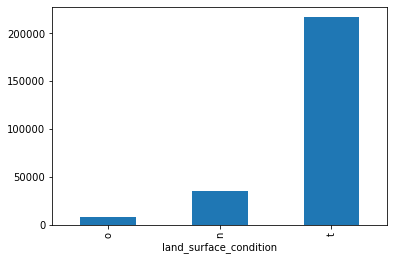

In [26]:
df.groupby('land_surface_condition')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

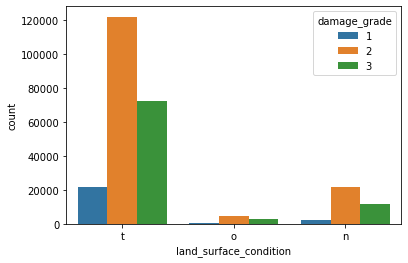

In [27]:
sns.countplot(x = df["land_surface_condition"], hue = df["damage_grade"])
plt.show()

Most of the buildings falls under the category of land surface condition t

#### foundation_type

In [28]:
df['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

<AxesSubplot:xlabel='foundation_type'>

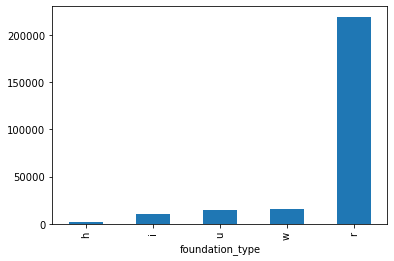

In [29]:
df.groupby('foundation_type')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

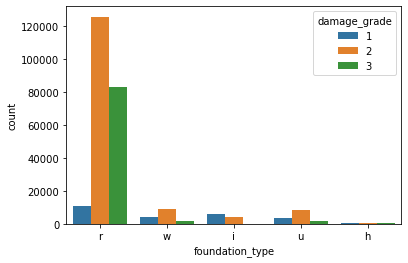

In [30]:
sns.countplot(x = df["foundation_type"], hue = df["damage_grade"])
plt.show()

Most of the buildings falls under the foundation type r

#### roof_type

In [31]:
df['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

<AxesSubplot:xlabel='roof_type'>

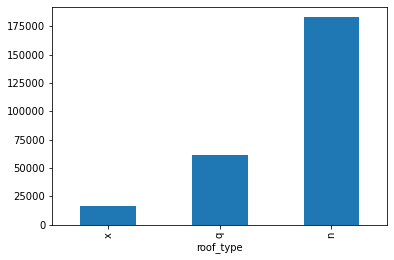

In [32]:
df.groupby('roof_type')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

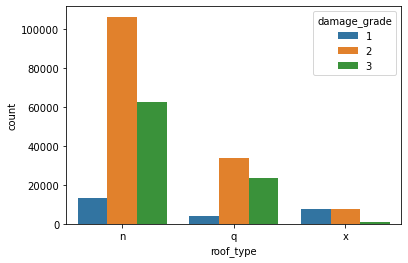

In [33]:
sns.countplot(x = df["roof_type"], hue = df["damage_grade"])
plt.show()

roof type is n in majory of the building

#### ground_floor_type

In [34]:
df['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

<AxesSubplot:xlabel='ground_floor_type'>

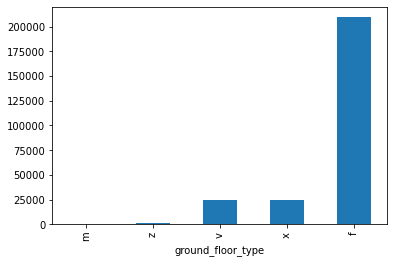

In [35]:
df.groupby('ground_floor_type')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

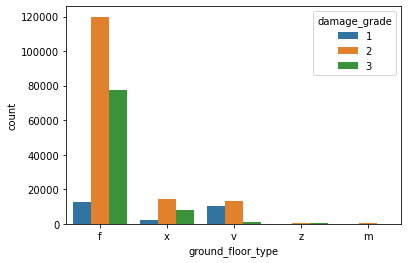

In [36]:
sns.countplot(x = df["ground_floor_type"], hue = df["damage_grade"])
plt.show()

Most of the building that was damaged has the ground floor type as f

#### other_floor_type

In [37]:
df['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

<AxesSubplot:xlabel='other_floor_type'>

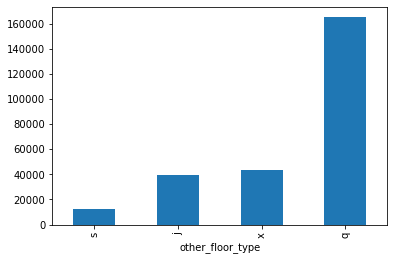

In [38]:
df.groupby('other_floor_type')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

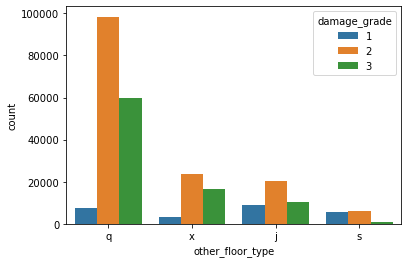

In [39]:
sns.countplot(x = df["other_floor_type"], hue = df["damage_grade"])
plt.show()

Most of the building that was damaged has the other floor type as q

#### position

In [40]:
df['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

<AxesSubplot:xlabel='position'>

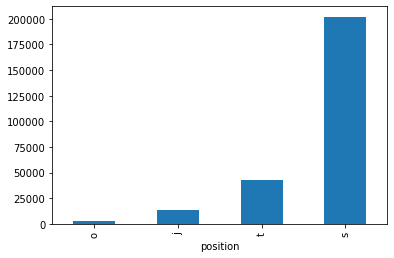

In [41]:
df.groupby('position')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

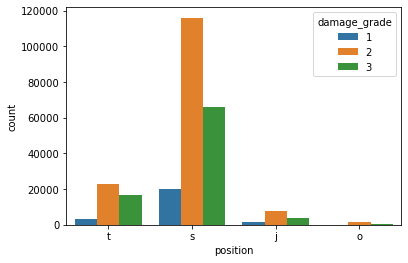

In [42]:
sns.countplot(x = df["position"], hue = df["damage_grade"])
plt.show()

The building in the position s is damaged the most

#### plan_configuration

In [43]:
df['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

<AxesSubplot:xlabel='plan_configuration'>

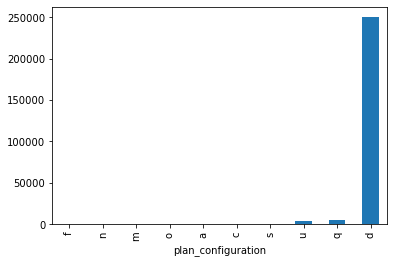

In [44]:
df.groupby('plan_configuration')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

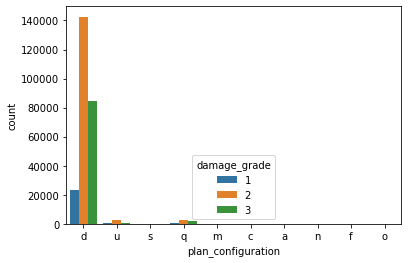

In [45]:
sns.countplot(x = df["plan_configuration"], hue = df["damage_grade"])
plt.show()

The building with the plan configuration u, q, d was damaged with d being the highest

#### legal_ownership_status

In [46]:
df['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

<AxesSubplot:xlabel='legal_ownership_status'>

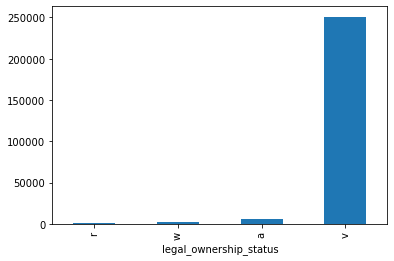

In [47]:
df.groupby('legal_ownership_status')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

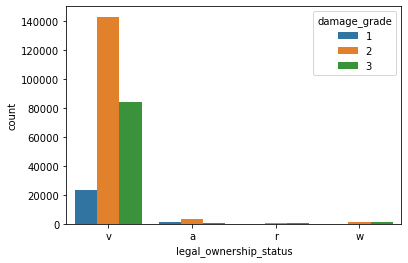

In [48]:
sns.countplot(x = df["legal_ownership_status"], hue = df["damage_grade"])
plt.show()

The building with legal ownership status as v is mostly damaged the highest

## Boolean Columns

#### has_superstructure_adobe_mud

<AxesSubplot:xlabel='damage_grade'>

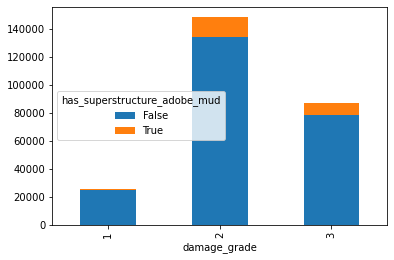

In [49]:
pd.crosstab(df.damage_grade,df.has_superstructure_adobe_mud).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_adobe_mud'>

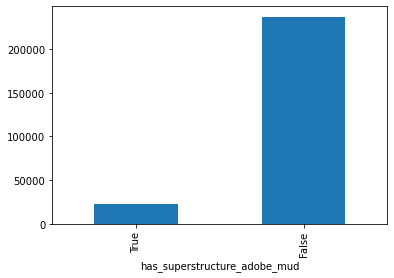

In [50]:
df.groupby('has_superstructure_adobe_mud')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

From the graph above we can see that the building that has superstructure adobe mud was not damaged mostly

#### has_superstructure_mud_mortar_stone

<AxesSubplot:xlabel='damage_grade'>

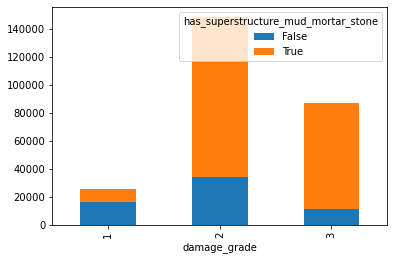

In [51]:
pd.crosstab(df.damage_grade,df.has_superstructure_mud_mortar_stone).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_mud_mortar_stone'>

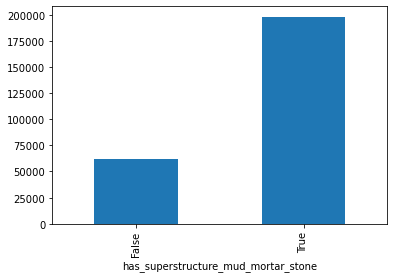

In [52]:
df.groupby('has_superstructure_mud_mortar_stone')['damage_grade'].count().sort_values(ascending=True).plot.bar()

The building that have superstructure mud mortar stone was damaged most when compare to the building that does not have superstructure mud mortar stone

#### has_superstructure_stone_flag

<AxesSubplot:xlabel='damage_grade'>

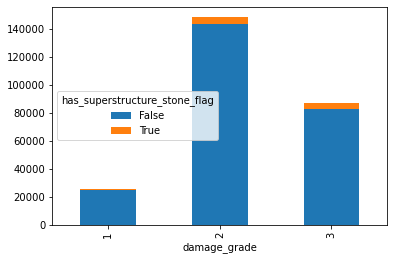

In [53]:
pd.crosstab(df.damage_grade,df.has_superstructure_stone_flag).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_stone_flag'>

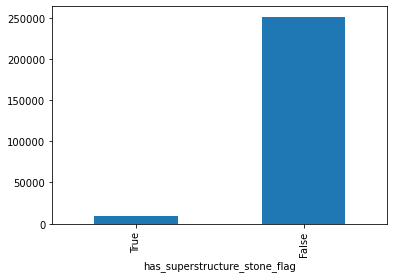

In [54]:
df.groupby('has_superstructure_stone_flag')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

The building thathas superstructure stone flag is more likley to be get damaged less

#### has_superstructure_cement_mortar_stone

<AxesSubplot:xlabel='damage_grade'>

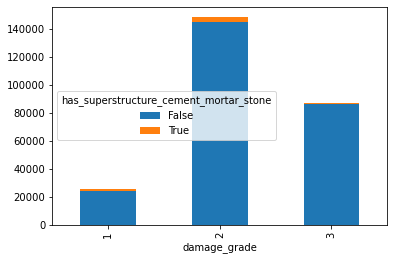

In [55]:
pd.crosstab(df.damage_grade,df.has_superstructure_cement_mortar_stone).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_cement_mortar_stone'>

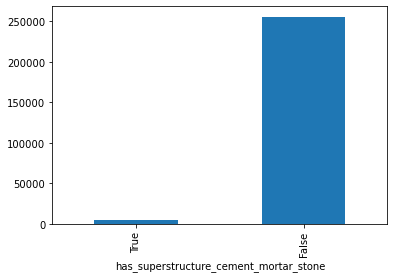

In [56]:
df.groupby('has_superstructure_cement_mortar_stone')['damage_grade'].count().sort_values(ascending=True).plot.bar() 

From above we can understand that building that does not have superstructure cement mortar stone is more likely to get damaged more

#### has_superstructure_mud_mortar_brick

<AxesSubplot:xlabel='damage_grade'>

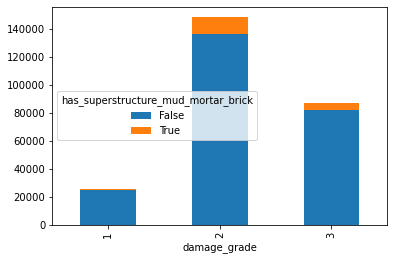

In [57]:
pd.crosstab(df.damage_grade,df.has_superstructure_mud_mortar_brick).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_mud_mortar_brick'>

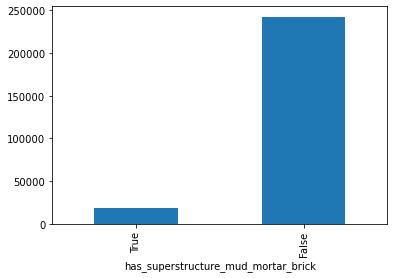

In [58]:
df.groupby('has_superstructure_mud_mortar_brick')['damage_grade'].count().sort_values(ascending=True).plot.bar()

superstructure mud mortar brick will decrease the damage of building

#### has_superstructure_cement_mortar_brick

<AxesSubplot:xlabel='damage_grade'>

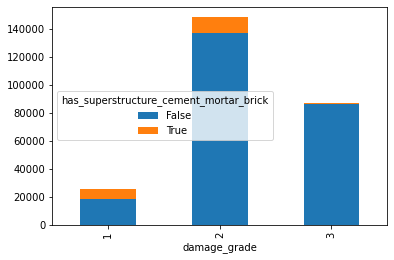

In [59]:
pd.crosstab(df.damage_grade,df.has_superstructure_cement_mortar_brick).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_cement_mortar_brick'>

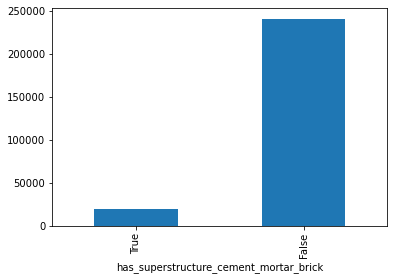

In [60]:
df.groupby('has_superstructure_cement_mortar_brick')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Budilding that has superstructure cement mortar brick is more strong

#### has_superstructure_timber

<AxesSubplot:xlabel='damage_grade'>

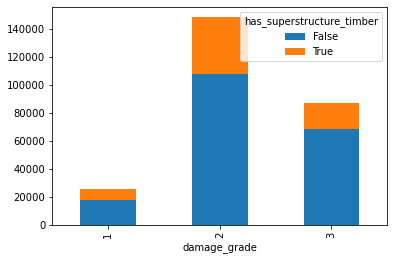

In [61]:
pd.crosstab(df.damage_grade,df.has_superstructure_timber).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_timber'>

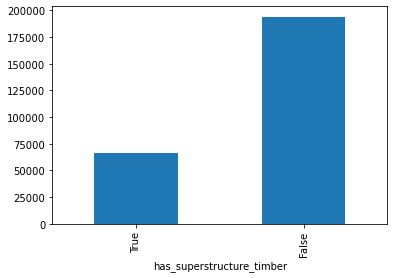

In [62]:
df.groupby('has_superstructure_timber')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Building with superstructure timber will decrease the building damage

#### has_superstructure_bamboo

<AxesSubplot:xlabel='damage_grade'>

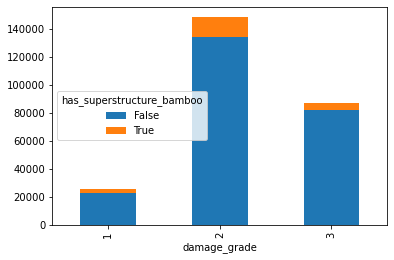

In [63]:
pd.crosstab(df.damage_grade,df.has_superstructure_bamboo).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_bamboo'>

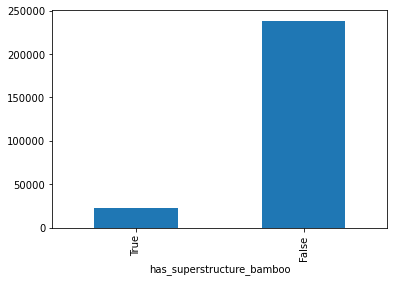

In [64]:
df.groupby('has_superstructure_bamboo')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Building with superstructure bamboo will decease the damage of building during earthquack

#### has_superstructure_rc_non_engineered

<AxesSubplot:xlabel='damage_grade'>

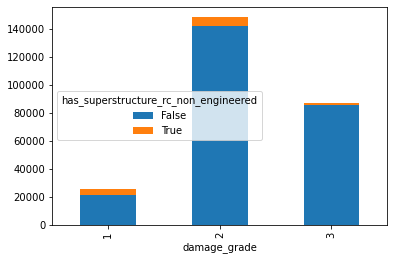

In [65]:
pd.crosstab(df.damage_grade,df.has_superstructure_rc_non_engineered).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_rc_non_engineered'>

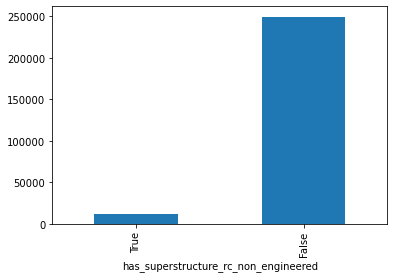

In [66]:
df.groupby('has_superstructure_rc_non_engineered')['damage_grade'].count().sort_values(ascending=True).plot.bar()

#### has_superstructure_rc_engineered

<AxesSubplot:xlabel='damage_grade'>

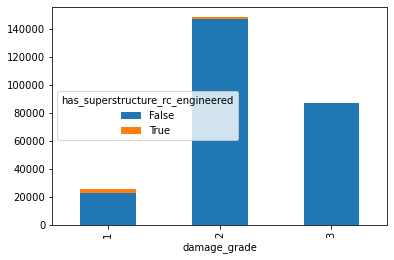

In [67]:
pd.crosstab(df.damage_grade,df.has_superstructure_rc_engineered).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_rc_engineered'>

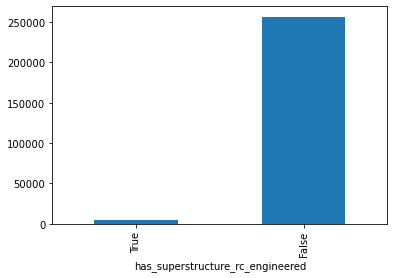

In [68]:
df.groupby('has_superstructure_rc_engineered')['damage_grade'].count().sort_values(ascending=True).plot.bar()

#### has_superstructure_other

<AxesSubplot:xlabel='damage_grade'>

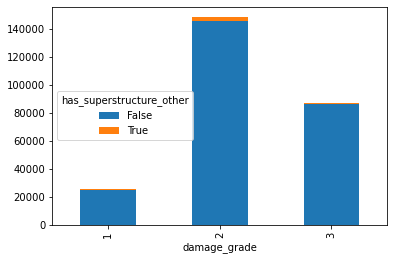

In [69]:
pd.crosstab(df.damage_grade,df.has_superstructure_other).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_superstructure_other'>

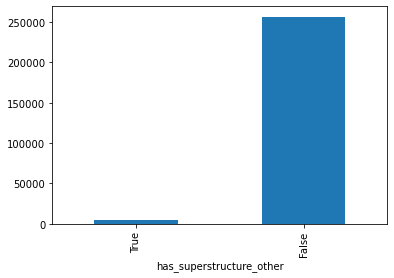

In [70]:
df.groupby('has_superstructure_other')['damage_grade'].count().sort_values(ascending=True).plot.bar()

The building's superstructure which was made of non-engineered reinforced concrete is more likely to get damaged

#### has_secondary_use

<AxesSubplot:xlabel='damage_grade'>

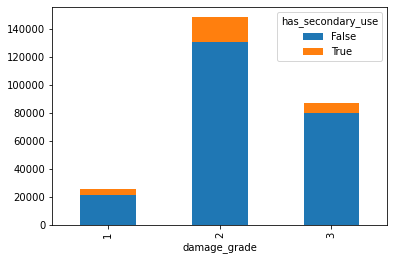

In [71]:
pd.crosstab(df.damage_grade,df.has_secondary_use).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use'>

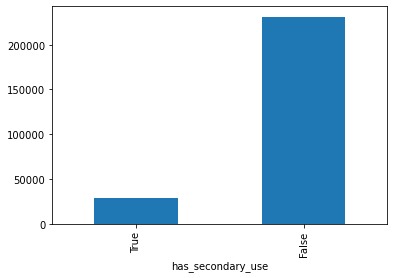

In [72]:
df.groupby('has_secondary_use')['damage_grade'].count().sort_values(ascending=True).plot.bar()

The building that has the secondary use is damaged less

#### has_secondary_use_agriculture

<AxesSubplot:xlabel='damage_grade'>

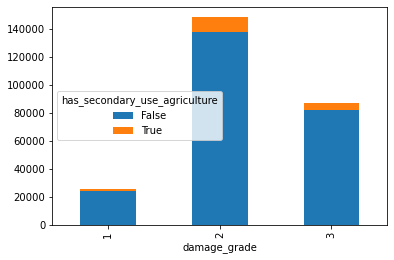

In [73]:
pd.crosstab(df.damage_grade,df.has_secondary_use_agriculture).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_agriculture'>

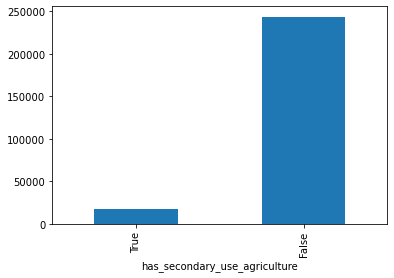

In [74]:
df.groupby('has_secondary_use_agriculture')['damage_grade'].count().sort_values(ascending=True).plot.bar()

The place where the building is build was used for agriculture has more likely to be damaged

#### has_secondary_use_hotel

<AxesSubplot:xlabel='damage_grade'>

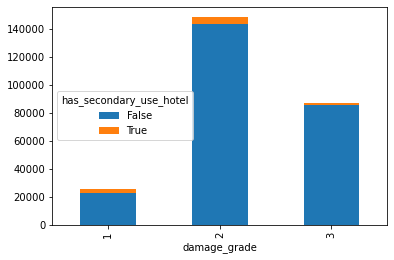

In [75]:
pd.crosstab(df.damage_grade,df.has_secondary_use_hotel).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_hotel'>

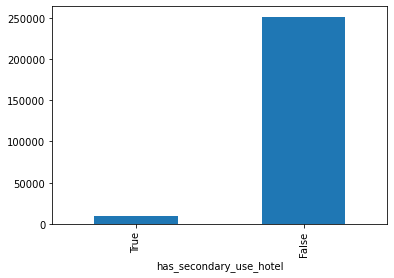

In [76]:
df.groupby('has_secondary_use_hotel')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Building with secondary use hotel is damaged more

#### has_secondary_use_rental

<AxesSubplot:xlabel='damage_grade'>

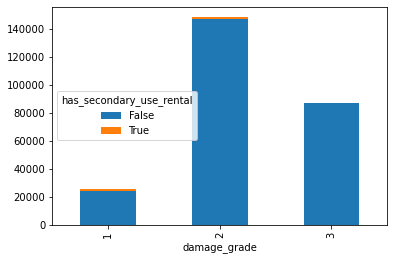

In [77]:
pd.crosstab(df.damage_grade,df.has_secondary_use_rental).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_rental'>

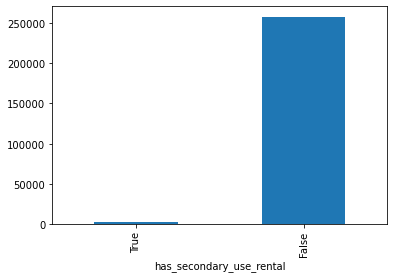

In [78]:
df.groupby('has_secondary_use_rental')['damage_grade'].count().sort_values(ascending=True).plot.bar()

secondary use rental buildings are damaged

#### has_secondary_use_institution

<AxesSubplot:xlabel='damage_grade'>

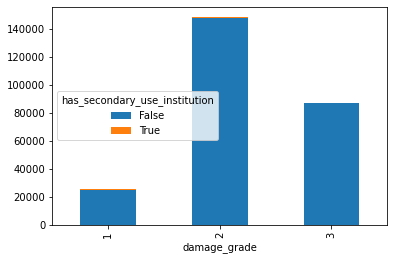

In [79]:
pd.crosstab(df.damage_grade,df.has_secondary_use_institution).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_institution'>

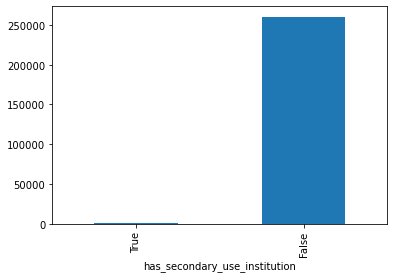

In [80]:
df.groupby('has_secondary_use_institution')['damage_grade'].count().sort_values(ascending=True).plot.bar()

secondary use institution buildings are damaged

#### has_secondary_use_school

<AxesSubplot:xlabel='damage_grade'>

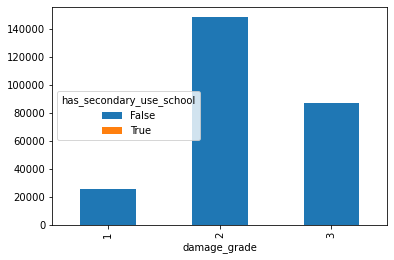

In [81]:
pd.crosstab(df.damage_grade,df.has_secondary_use_school).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_school'>

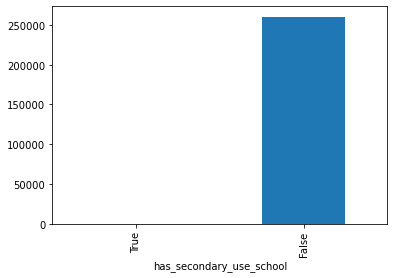

In [82]:
df.groupby('has_secondary_use_school')['damage_grade'].count().sort_values(ascending=True).plot.bar()

All the building that is used secondary for schools are damaged

#### has_secondary_use_industry

<AxesSubplot:xlabel='damage_grade'>

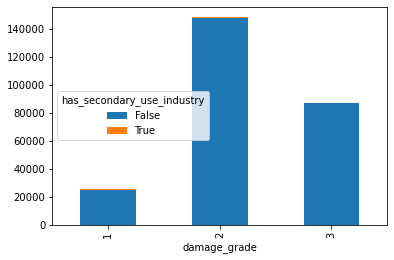

In [83]:
pd.crosstab(df.damage_grade,df.has_secondary_use_industry).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_industry'>

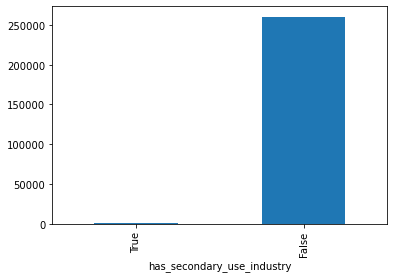

In [84]:
df.groupby('has_secondary_use_industry')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Only very few buildings are not damaged that was used for industrial purposes.

#### has_secondary_use_health_post

<AxesSubplot:xlabel='damage_grade'>

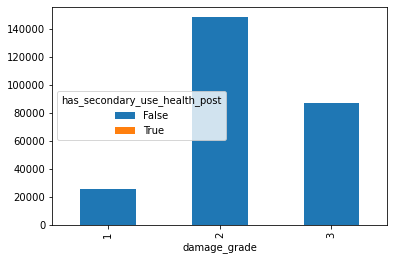

In [85]:
pd.crosstab(df.damage_grade,df.has_secondary_use_health_post).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_health_post'>

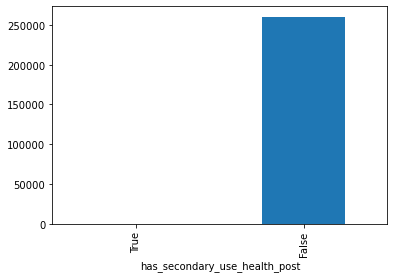

In [86]:
df.groupby('has_secondary_use_health_post')['damage_grade'].count().sort_values(ascending=True).plot.bar()

All the building that was used for health care was damaged

#### has_secondary_use_gov_office

<AxesSubplot:xlabel='damage_grade'>

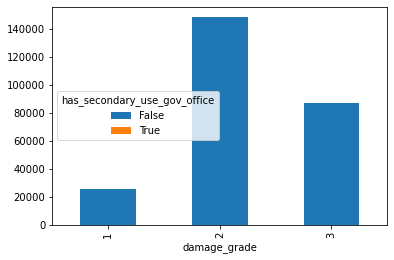

In [87]:
pd.crosstab(df.damage_grade,df.has_secondary_use_gov_office).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_gov_office'>

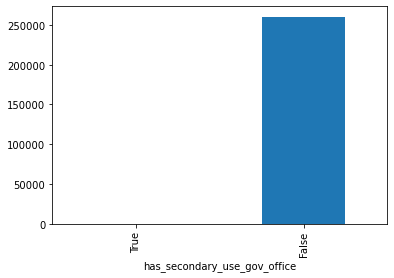

In [88]:
df.groupby('has_secondary_use_gov_office')['damage_grade'].count().sort_values(ascending=True).plot.bar()

All the building that was used as Govt office was damaged

#### has_secondary_use_use_police

<AxesSubplot:xlabel='damage_grade'>

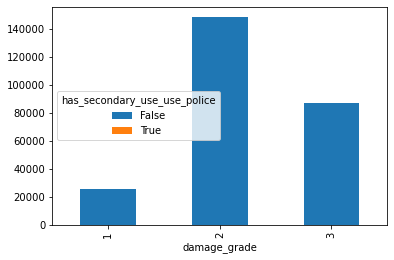

In [89]:
pd.crosstab(df.damage_grade,df.has_secondary_use_use_police).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_use_police'>

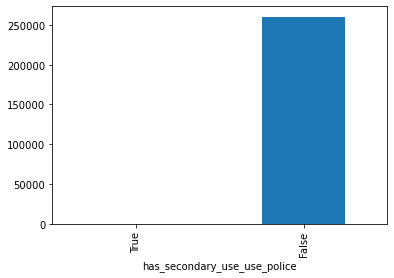

In [90]:
df.groupby('has_secondary_use_use_police')['damage_grade'].count().sort_values(ascending=True).plot.bar()

#### has_secondary_use_other

<AxesSubplot:xlabel='damage_grade'>

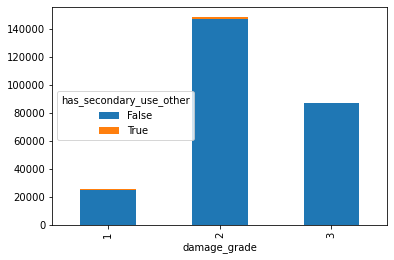

In [91]:
pd.crosstab(df.damage_grade,df.has_secondary_use_other).plot.bar(stacked= True)

<AxesSubplot:xlabel='has_secondary_use_other'>

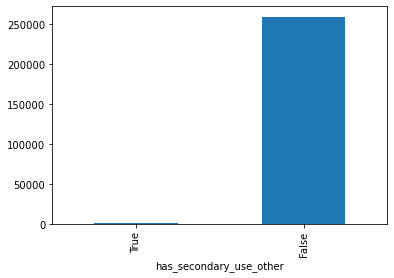

In [92]:
df.groupby('has_secondary_use_other')['damage_grade'].count().sort_values(ascending=True).plot.bar()

Almost all the building that has secondary use for others are damaged

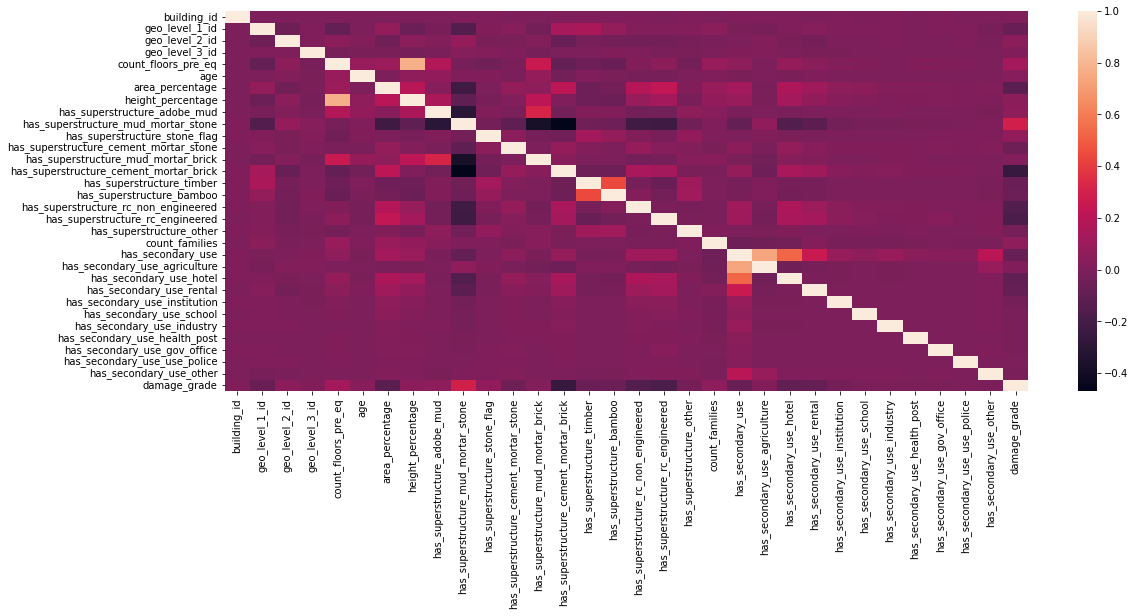

In [93]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr())
plt.show()

This graph shows the correaltion among all the variables.

1) There are not a lot of correlated fields

2) has_secondary_use is correlated with it's sub_parts

3) height_percentage is highly correlated with count_floors_pre_eq

4) area_percentage and height_percentage are correlated with has_super_structure features and seconday use of buildings

In [94]:
data_corr = df.corr()
table = data_corr['damage_grade'].sort_values(ascending=False)
table

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
building_id                               0.001063
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution  

The above table shows the correlation among all the variables against damage grade in the dataset



'has_superstructure_mud_mortar_stone' has the most positive correlation

'has_superstructure_cement_mortar_brick' has the most negative correlation

In [95]:
# lable encoding is to convert categorical data into nummbers
label_encoder = preprocessing.LabelEncoder()
df['land_surface_condition']= label_encoder.fit_transform(df['land_surface_condition'])
df['foundation_type']= label_encoder.fit_transform(df['foundation_type'])
df['roof_type']= label_encoder.fit_transform(df['roof_type'])
df['ground_floor_type']= label_encoder.fit_transform(df['ground_floor_type'])
df['other_floor_type']= label_encoder.fit_transform(df['other_floor_type'])
df['position']= label_encoder.fit_transform(df['position'])
df['plan_configuration']= label_encoder.fit_transform(df['plan_configuration'])
df['legal_ownership_status']= label_encoder.fit_transform(df['legal_ownership_status'])
df['damage_grade']= label_encoder.fit_transform(df['damage_grade'])

In [96]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,...,False,False,False,False,False,False,False,False,False,2
1,28830,8,900,2812,2,10,8,7,1,2,...,False,False,False,False,False,False,False,False,False,1
2,94947,21,363,8973,2,10,5,5,2,2,...,False,False,False,False,False,False,False,False,False,2
3,590882,22,418,10694,2,10,6,5,2,2,...,False,False,False,False,False,False,False,False,False,1
4,201944,11,131,1488,3,30,8,9,2,2,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,2,...,False,False,False,False,False,False,False,False,False,1
260597,669485,17,715,2060,2,0,6,5,2,2,...,False,False,False,False,False,False,False,False,False,2
260598,602512,17,51,8163,3,55,6,7,2,2,...,False,False,False,False,False,False,False,False,False,2
260599,151409,26,39,1851,2,10,14,6,2,2,...,False,False,False,False,False,False,False,False,False,1


# Modeling

In [97]:
X = df.iloc[:,:-1]
y = df.damage_grade

Setting predictor and target variables

# Logistic Regression

In [98]:
# Fine tuning parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=20)
reg_model = LogisticRegression()
parameters = {'solver':['liblinear', 'lbfgs', 'sag'],
             'C':[100,150,125]}

grid_model = GridSearchCV(reg_model, parameters, cv=5, scoring='accuracy', error_score=0)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 125],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [99]:
# Best parameters
grid_model.best_params_

{'C': 100, 'solver': 'liblinear'}

Using Grid search CV finding the best paramaters which is - 'C': 100, 'solver': 'liblinear'

In [100]:
# Logistic Regression modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
reg_model = LogisticRegression(solver='liblinear' ,C=100)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[0 1 0]
 [0 8 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         8
           2       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.27      0.33      0.30        10
weighted avg       0.64      0.80      0.71        10



#### Logistic Regression gives 80% Accuracy score

# Random Forest Classifier

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
rfc_model = RandomForestClassifier(n_estimators=50)
parameters = {"max_depth": [3, None],
              "max_features": [1,6,9,12],
              "criterion": ["gini","log_loss"]}

rscv_model = RandomizedSearchCV (rfc_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'criterion': ['gini', 'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 6, 9, 12]})

In [102]:
rscv_model.best_params_

{'max_features': 12, 'max_depth': None, 'criterion': 'gini'}

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, random_state=20)
rfc_model = RandomForestClassifier(max_features=12,max_depth= None,criterion='gini')
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.6666666666666666
[[0 1 0]
 [1 8 1]
 [0 2 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.80      0.76        10
           2       0.67      0.50      0.57         4

    accuracy                           0.67        15
   macro avg       0.46      0.43      0.44        15
weighted avg       0.66      0.67      0.66        15



####  Random Forest Classifier gives 66% Accuracy score

# Decision Tree Classifier

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
dtc_model = DecisionTreeClassifier()
parameters = {'max_depth':[10,None],
             'criterion': ['gini','entropy']}

rscv_model = RandomizedSearchCV (dtc_model, param_distributions=parameters,cv=5)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, None]})

In [105]:
rscv_model.best_params_

{'max_depth': 10, 'criterion': 'gini'}

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
dtc_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.9
[[1 0 0]
 [0 8 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.89      1.00      0.94         8
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.63      0.67      0.65        10
weighted avg       0.81      0.90      0.85        10



####  Decision Tree Classifier gives 90% Accuracy score

# K Nearest Neighbors Classifier

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, random_state=15)
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.6
[[0 2 0]
 [0 8 0]
 [0 4 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      1.00      0.73         8
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.52      0.40      0.35        15
weighted avg       0.64      0.60      0.50        15



####  KNeighbors Classifier gives 60% Accuracy score

# Naive Bayes

## Gaussian Naive Bayes

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
gnb_model_Multi = GaussianNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[0 1 0]
 [0 8 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         8
           2       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.27      0.33      0.30        10
weighted avg       0.64      0.80      0.71        10



## Multinomial Naive Bayes

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
gnb_model_Multi = MultinomialNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.5
[[0 1 0]
 [2 5 1]
 [0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.62      0.67         8
           2       0.00      0.00      0.00         1

    accuracy                           0.50        10
   macro avg       0.24      0.21      0.22        10
weighted avg       0.57      0.50      0.53        10



## Bernoulli Naive Bayes

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=40)
gnb_model_berno = BernoulliNB()
gnb_model_berno.fit(X_train, y_train)
y_pred = gnb_model_berno.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[ 5  1  0]
 [ 0 12  2]
 [ 0  2  3]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      0.86      0.83        14
           2       0.60      0.60      0.60         5

    accuracy                           0.80        25
   macro avg       0.80      0.76      0.78        25
weighted avg       0.81      0.80      0.80        25



There are 3 main types of Naive Bayes algorithms that are commonly used in classification tasks:

#### 1) Gaussian Naive Bayes (GaussianNB) which gives 80% accuracy

#### 2) Multinomial Naive Bayes (MultinomialNB) which gives 50% accuracy

#### 3) Bernoulli Naive Bayes (BernoulliNB) which gives 80% accuracy

# XG Boost Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### XG Boost Classifier gives 80% accuracy

# Final Report
## Introduction
1) A destructive earthquake of 7.8 magnitude occurred in Nepal in April 2015. This earthquake claimed almost 9,000 lives and around $10 billion in damages. Millions of people lost everything and became homeless in a few moments.

2) Following the earthquake, the Nepalese government launched massive survey to assess damages happened to buildings in affected districts. Although the primary goal of this survey was to identify beneficiaries eligible for government assistance for housing reconstruction, it also collected other useful socio-economic information.

3) In addition to housing reconstruction, this data serves a wide range of uses and users e.g. researchers, newly formed local governments, and citizens at large. This survey is one of the largest post-disaster datasets ever collected.

## Objective

1) The objective of this project is to predict amount of damage (damage_grade) to the buildings

2) The 3 grades of damage are:

    1- Represents low damage
    
    2- Represents medium damage
    
    3- Represents high damage, i.e completely destroyed
## Dataset
1) The dataset mainly consists of information on the buildings' structure and their legal ownership.

2) There are totally 40 columns including the target variable
    
    10 Integer columns
    
    8 Categorical columns
    
    22 Binary columns
## Data Preparation
1) The data was already cleaned and did not require any pre-processing

2) There are no missing values in the dataset

3) The binary column was also in the form of Integer which was converted into Boolean

## Exploratory Data Analysis
1) Maximum damage happened to 2-storey buildings

2) There are few outliers after 100 years of age

3) There are very small number of older buildings with low grade damage

4) Land surface condition value t is most damaged

5) Foundation type r is mostly damaged

6) Roof type n is more likely to get damaged

7) Ground floor type f is most damaged and almost m is not damaged at all

8) Other floor type q is most damaged

9) Position s is damaged

10) Plan configuration d, q u is damaged, d being the largest of damaged

11) Legal ownership status of v is mostly damaged
12) Top 5 types of structures those got damaged the most were made up of timber, bamboo and some form of mud

13) stone_flag, cement_mortar_stone and rc_engineered type were affected the least

14) There are not a lot of correlated fields

15) has_secondary_use is correlated with its sub_parts

16) height_percentage is highly correlated with count_floors_pre_eq

17) area_percentage and height_percentage are correlated with has_super_structure features and secondary use of buildings

## Model Training and Evaluation
We have tried with different models such as:

    1) Logistic Regression (Accuracy – 80%)
    
    2) Random Forest Classifier (Accuracy - 66%))
    
    3) Decision Tree Classifier (Accuracy - 90%))
    
    4) K Nearest Neighbors Classifier (Accuracy – 60%)
    
    5) Naive Bayes:
    
        i) Gaussian Naive Bayes (Accuracy – 80%)

        ii) Multinomial Naive Bayes (Accuracy – 50%)

        iii) Bernoulli Naive Bayes (Accuracy – 80%)

    6) XG Boost Classifier (Accuracy – 80%)

#### Decision Tree Classifier gave the highest accuracy of 90%
## Limitations
1) The system we are working on does have the capacity to fine tuning the parameters
## Future Work
2) Neural network can be tried to check if that gives a better score.
## Conclusion and Business case
1) From the Exploratory Data analysis we need to construct the building that cause has less damage
